<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/PCA_Missforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')

In [69]:
df

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,Recent_Date,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Recent_Creatinine,Recent_eGFR
0,0,2299,3386255,-7.158596,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2559-08-15 08:13:26.043,...,91.00,5.400,215.00,81.00,123.00,99.00,57.671,1,0.73,79.14
1,1,2299,4546471,5.550691,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2560-10-03 07:37:22.777,...,86.00,5.567,219.00,64.00,146.00,73.00,146.106,1,0.73,79.14
2,2,2299,5812902,-6.063710,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2561-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,50.831,1,0.73,79.14
3,3,2299,6947220,-12.812245,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2562-12-19 08:19:38.647,...,89.00,5.292,205.00,69.00,139.00,76.00,121.937,1,0.73,79.14
4,4,2299,8186767,28.287500,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2564-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,41.564,1,0.73,79.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,3319961,9270330,-4.256753,0,1,0,2566-04-04 08:28:58.833,บูรณาการนอกเวลา (คลินิก)-OD191,2565-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,2.04,33.68
52616,52616,3319971,9270331,-0.692078,0,1,0,2566-04-04 08:49:20.047,บูรณาการนอกเวลา (คลินิก)-OD191,2565-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,1.87,26.47
52617,52617,3320048,9242721,7.217875,0,0,1,2566-04-10 08:36:15.217,OPD AE-DV191,2565-03-05 12:36:33.263,...,118.23,6.485,112.00,96.00,64.00,33.00,66.802,1,1.09,70.36
52618,52618,3320050,9257281,-32.794557,0,1,0,2566-04-10 08:58:57.267,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2565-03-10 07:42:44.243,...,125.46,6.954,200.73,123.51,139.59,54.62,69.781,1,2.14,30.69


In [6]:
df.shape

(52620, 84)

In [9]:
#ตรวจสอบค่าว่าง
df.isnull().any()

Unnamed: 0                   False
PatientUID                   False
PatientVisitUID              False
Slopes                       False
InPatient                    False
                             ...  
L24-HDL-Cholesterol          False
L28-UrineProtein-Cr-ratio    False
LabLocation                  False
Recent_Creatinine            False
Recent_eGFR                  False
Length: 84, dtype: bool

## Standardization

In [22]:
#เช็คประเภทของข้อมูล
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52620 non-null  int64  
 1   PatientUID                    52620 non-null  int64  
 2   PatientVisitUID               52620 non-null  int64  
 3   Slopes                        52620 non-null  float64
 4   InPatient                     52620 non-null  int64  
 5   OutPatient                    52620 non-null  int64  
 6   Emergency                     52620 non-null  int64  
 7   Recent_Date                   52620 non-null  object 
 8   VisitLocation                 52620 non-null  object 
 9   StartDTTM                     52620 non-null  object 
 10  EndDttm                       52620 non-null  object 
 11  LabCwhen                      52620 non-null  object 
 12  G1M2-ARB                      52620 non-null  int64  
 13  G

In [44]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Hear

In [49]:
# เลือกคอลัมน์ที่ต้องการทำ Standard Scaling โดยจะไม่ใช้คอลัมน์ที่เป็น 'object' , หมวดหมู่ (0,1)
selected_columns = [ 'Slopes',  'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio', 'Recent_Creatinine',
       'Recent_eGFR']
selected_data = df[selected_columns]

# สร้าง object StandardScaler
scaler = StandardScaler()

# ทำ Standard Scaling บนข้อมูลที่เลือก
scaled_data = scaler.fit_transform(selected_data)

# สร้าง DataFrame ใหม่จากข้อมูลที่ทำ Standard Scaling แล้ว
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)
scaled_df

,Slopes,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,...,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Recent_Creatinine,Recent_eGFR
0,-0.509876,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,...,-0.647948,-0.624851,-0.782037,0.970161,-0.843492,0.306227,3.930974,-0.487620,-0.597581,1.634954
1,0.788925,2.991739,1.392719,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,...,0.262693,-0.734103,-0.664877,1.070025,-1.081069,0.945928,1.766080,0.847718,-0.597581,1.634954
2,-0.397986,3.360578,1.625099,4.073425,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,...,0.834670,-0.428197,-0.852192,0.420909,-1.109019,0.473106,1.099958,-0.590902,-0.597581,1.634954
3,-1.087639,0.963126,-0.698699,-0.005894,2.205286,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,...,-0.597041,-0.668552,-0.857805,0.720501,-1.011194,0.751236,2.015875,0.482774,-0.597581,1.634954
4,3.112467,3.360578,-0.698699,1.724726,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,...,2.363143,-0.690402,-0.711881,0.545739,-0.941318,0.473106,0.683633,-0.730831,-0.597581,1.634954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,-0.213328,3.360578,1.625099,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,2.69524,...,0.746246,-0.362646,-0.431258,-0.278140,2.370785,-0.778482,-0.731875,0.624152,0.319038,-0.940410
52616,0.150957,-0.327810,1.625099,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,...,1.441007,-0.450048,0.410611,-0.552766,0.763646,-0.806295,-0.815140,3.561035,0.200087,-1.348866
52617,0.959299,-0.327810,-0.698699,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,...,-1.464355,-0.029864,-0.020847,-1.601338,-0.633865,-1.334743,-1.564527,-0.349745,-0.345686,1.137556
52618,-3.129692,-0.327810,-0.698699,-0.129510,-0.176477,-0.333859,-0.335682,-0.093112,-0.284879,-0.40824,...,0.733614,0.128114,0.308183,0.613896,-0.249410,0.767646,0.235666,-0.304764,0.389009,-1.109797


In [50]:
#คอลัมน์จาก 84 เลือกมา 69 คอลัมน์
# หลังจากาารทำ StandardScaler จะได้ค่า mean = 0, std = 1
scaled_df.describe().round(2)

,Slopes,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,...,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Recent_Creatinine,Recent_eGFR
count,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,...,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-7.85,-0.33,-0.70,-0.13,-0.18,-0.33,-0.34,-0.09,-0.28,-0.41,...,-3.12,-2.39,-30.67,-3.67,-1.70,-3.09,-3.98,-1.36,-0.92,-2.79
25%,-0.43,-0.33,-0.70,-0.13,-0.18,-0.33,-0.34,-0.09,-0.28,-0.41,...,-0.53,-0.58,-0.64,-0.58,-0.55,-0.64,-0.53,-0.67,-0.38,-0.54
50%,0.05,-0.33,-0.70,-0.13,-0.18,-0.33,-0.34,-0.09,-0.28,-0.41,...,-0.08,-0.31,-0.34,-0.05,-0.20,-0.05,-0.05,-0.19,-0.23,0.13
75%,0.48,-0.33,0.93,-0.13,-0.18,-0.33,-0.34,-0.09,-0.28,-0.41,...,0.43,0.23,0.34,0.42,0.25,0.42,0.40,0.49,-0.04,0.61
max,11.15,13.13,8.60,24.59,16.97,10.40,7.35,26.48,10.03,9.37,...,25.71,19.00,12.41,17.20,28.64,16.16,12.01,34.28,19.73,5.13


##PCA

In [65]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# สร้าง object PCA
pca = PCA()
# ทำการ fit-transform
pca.fit_transform(scaled_df)

#Print results
print(f'Eigenvalues = {pca.explained_variance_}') #Explained variance
print(f'Explaining ratio = {pca.explained_variance_ratio_}')

Eigenvalues = [4.49726647e+00 3.84838220e+00 2.88969730e+00 2.73222035e+00
 1.81041837e+00 1.55211106e+00 1.51681946e+00 1.38687369e+00
 1.31609862e+00 1.27435477e+00 1.15245249e+00 1.15156853e+00
 1.08836328e+00 1.06750613e+00 1.06511973e+00 1.05087124e+00
 1.04618758e+00 1.03755801e+00 1.03227576e+00 1.02305050e+00
 1.01954489e+00 1.01428479e+00 1.01329385e+00 1.00897766e+00
 1.00463587e+00 1.00126863e+00 9.96354670e-01 9.91916493e-01
 9.88160070e-01 9.81337475e-01 9.77471111e-01 9.74450640e-01
 9.70317869e-01 9.61449129e-01 9.54983522e-01 9.51478436e-01
 9.42128931e-01 9.38203573e-01 9.21147054e-01 9.00825605e-01
 8.84222779e-01 8.72939931e-01 8.43639234e-01 8.30757631e-01
 7.95172335e-01 7.90010724e-01 7.61778602e-01 7.55193592e-01
 7.28373524e-01 7.15833273e-01 6.74528180e-01 6.48017963e-01
 6.21177263e-01 5.90935576e-01 5.66884681e-01 5.48037994e-01
 4.97497473e-01 4.68494168e-01 4.50897386e-01 4.14792095e-01
 3.58923419e-01 3.18709591e-01 2.54229377e-01 1.95548203e-01
 1.7396048

explained variance หรือ ค่าอธิบายความเเปรปรวนข้อมูล ซึ่งจะเลือกค่าที่มีความแปรปรวนสูง(ค่ายิ่งสูงยิ่งดี) ปล.ควรเลือกเกิน 80% ขึ้นไป

In [63]:
exp_variance = pca.explained_variance_ratio_
exp_variance

array([6.61350148e-02, 5.65927803e-02, 4.24947409e-02, 4.01789474e-02,
       2.66232936e-02, 2.28247288e-02, 2.23057446e-02, 2.03948137e-02,
       1.93540236e-02, 1.87401552e-02, 1.69475087e-02, 1.69345096e-02,
       1.60050382e-02, 1.56983212e-02, 1.56632277e-02, 1.54536951e-02,
       1.53848191e-02, 1.52579160e-02, 1.51802374e-02, 1.50445743e-02,
       1.49930223e-02, 1.49156694e-02, 1.49010970e-02, 1.48376248e-02,
       1.47737762e-02, 1.47242588e-02, 1.46519961e-02, 1.45867300e-02,
       1.45314896e-02, 1.44311592e-02, 1.43743020e-02, 1.43298841e-02,
       1.42691092e-02, 1.41386891e-02, 1.40436084e-02, 1.39920640e-02,
       1.38545739e-02, 1.37968492e-02, 1.35460228e-02, 1.32471836e-02,
       1.30030290e-02, 1.28371080e-02, 1.24062235e-02, 1.22167918e-02,
       1.16934886e-02, 1.16175840e-02, 1.12024136e-02, 1.11055771e-02,
       1.07111718e-02, 1.05267598e-02, 9.91934354e-03, 9.52949482e-03,
       9.13478615e-03, 8.69006391e-03, 8.33638099e-03, 8.05922910e-03,
      

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06613501, 0.1227278 , 0.16522254, 0.20540148, 0.23202478,
       0.25484951, 0.27715525, 0.29755006, 0.31690409, 0.33564424,
       0.35259175, 0.36952626, 0.3855313 , 0.40122962, 0.41689285,
       0.43234654, 0.44773136, 0.46298928, 0.47816952, 0.49321409,
       0.50820711, 0.52312278, 0.53802388, 0.5528615 , 0.56763528,
       0.58235954, 0.59701154, 0.61159827, 0.62612975, 0.64056091,
       0.65493522, 0.6692651 , 0.68353421, 0.6976729 , 0.71171651,
       0.72570857, 0.73956314, 0.75335999, 0.76690602, 0.7801532 ,
       0.79315623, 0.80599334, 0.81839956, 0.83061635, 0.84230984,
       0.85392743, 0.86512984, 0.87623542, 0.88694659, 0.89747335,
       0.90739269, 0.91692219, 0.92605697, 0.93474704, 0.94308342,
       0.95114265, 0.95845865, 0.96534814, 0.97197885, 0.97807862,
       0.98335681, 0.98804362, 0.99178222, 0.99465787, 0.99721607,
       0.99913373, 0.99963815, 1.        , 1.        ])

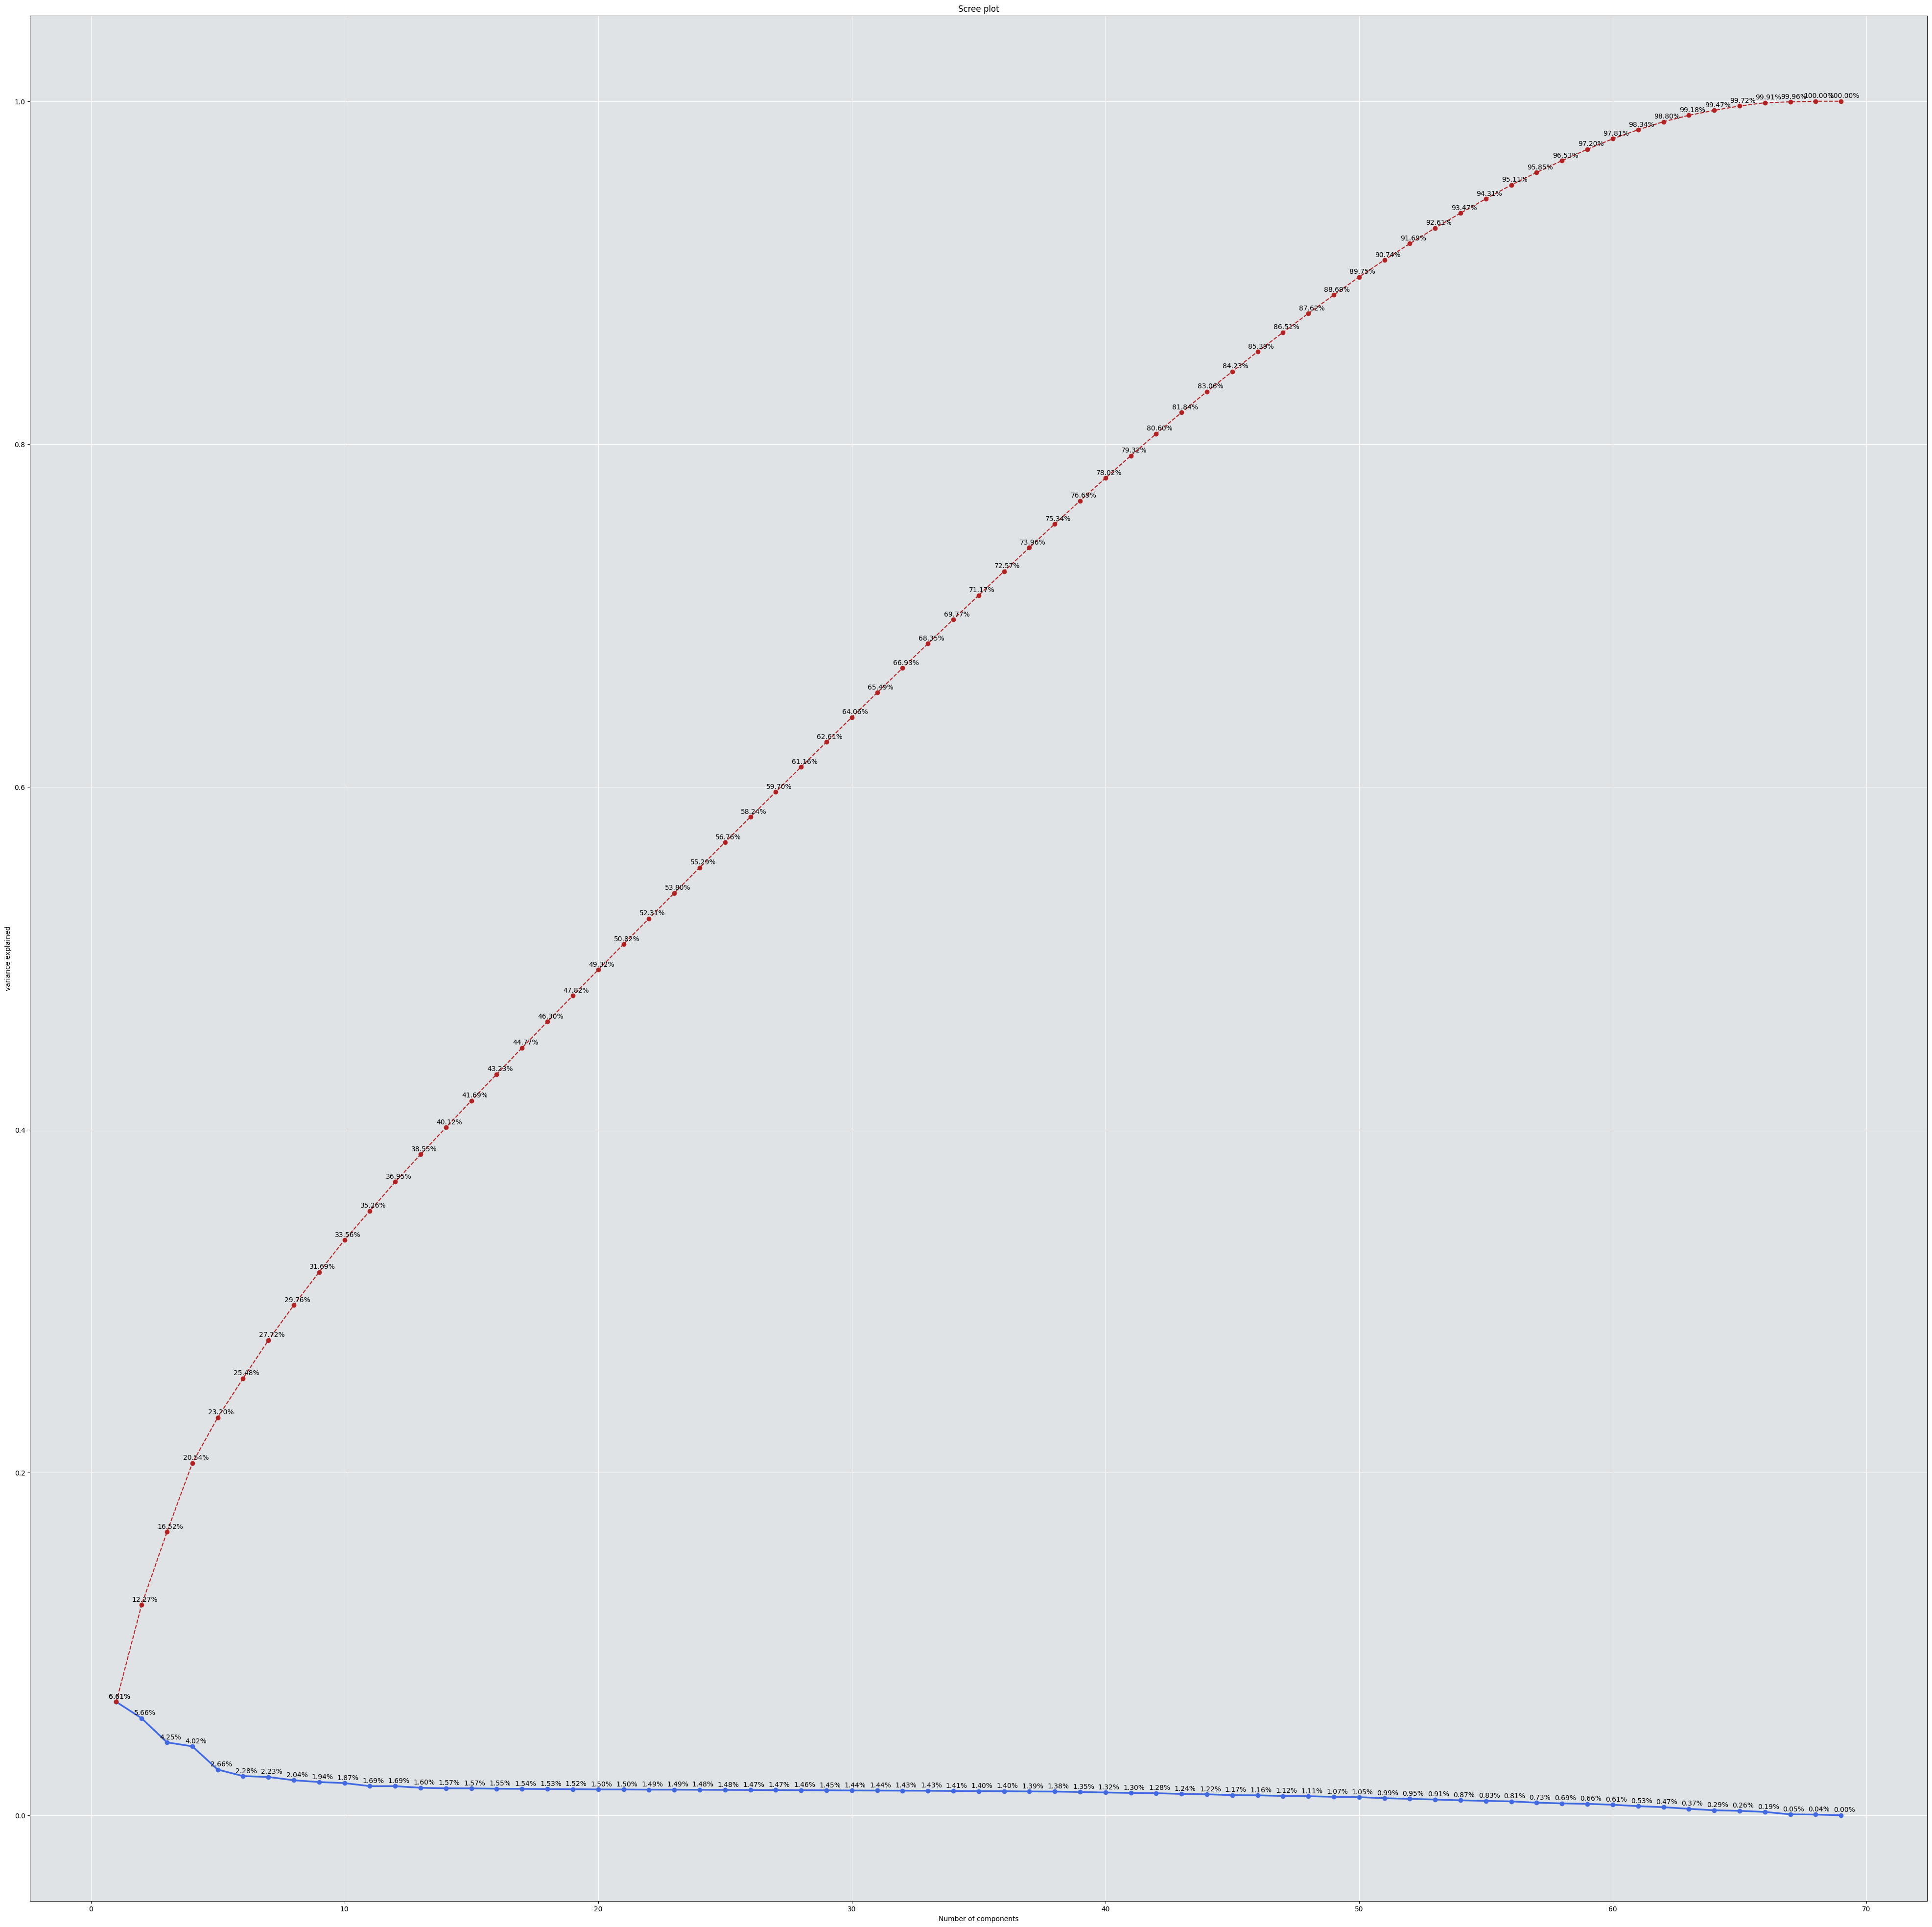

In [62]:
#Scree plot
explain_ratio = pca.explained_variance_ratio_
explain_ratio_cum = np.cumsum(pca.explained_variance_ratio_)

#Create blank graph
plt.figure(figsize = (50, 50))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.xlabel('Number of components')
plt.ylabel('variance explained')
plt.title('Scree plot')

#Plotting
plt.plot(range(1, explain_ratio.shape[0] + 1), explain_ratio, c = 'royalblue', marker = 'o', linewidth = 2.5, label = 'Individual')
plt.plot(range(1, explain_ratio.shape[0] + 1), explain_ratio_cum, c = 'firebrick', marker = 'o', linestyle = '--', label = 'Cumulative')

#Adding values to plot
for x, ex_ratio, ex_ratio_cum in zip(range(1, explain_ratio.shape[0] + 1),
                                     explain_ratio,
                                     explain_ratio_cum):
  ex_ratio_label = f'{ex_ratio * 100:.2f}%'
  plt.annotate(ex_ratio_label, (x, ex_ratio), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')
  ex_ratio_cum_label = f'{ex_ratio_cum * 100:.2f}%'
  plt.annotate(ex_ratio_cum_label, (x, ex_ratio_cum), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')

#Show
plt.show()